<a href="https://colab.research.google.com/github/Cecileambrose/Unraveling-Patient-s-Sentiment/blob/main/HealthPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

Reading the dataset

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Patient's review dataset - Sheet1.csv")

Exploratory Data Analysis

In [3]:
df.head()

,Hospital,Patient's Review,Class
0,Well Key Health,Took my 8-year-old daughter for a UTI. The sta...,1
1,Well Key Health,My 7 year old son just went for his 2nd visit ...,1
2,Well Key Health,I appreciate the cleanliness of the office! Su...,1
3,Well Key Health,I was treated with respect and the staff had a...,1
4,Well Key Health,The nurse was amazing. She was very caring and...,1


In [4]:
df.tail()

,Hospital,Patient's Review,Class
245,Xcellent care hospital,Definitely money minded hospital. They wont le...,0
246,KKCT hospital,hospital admission there are no response from ...,0
247,Supreme speciality hospital,Wife got admitted accidentally as it was near ...,0
248,Xcellent care hospital,They only look only for money and never respon...,0
249,Prashanth multispeciality hospital,Its a worst hospital.dont go there.fully money...,0


In [5]:
df.columns

Index(['Hospital', 'Patient's Review', 'Class'], dtype='object')

In [6]:
print("Dimension of dataset: ", df.shape)

Dimension of dataset:  (250, 3)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hospital          250 non-null    object
 1   Patient's Review  250 non-null    object
 2   Class             250 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


In [8]:
df.dtypes

,0
Hospital,object
Patient's Review,object
Class,int64


In [9]:
# Checking for null values
np.sum(df.isnull().any(axis = 1))

0

In [10]:
# Checking unique target  values (There are 2 values: 0: negative & 4: positive)
df["Class"].unique()

array([1, 0])

Data Visualization

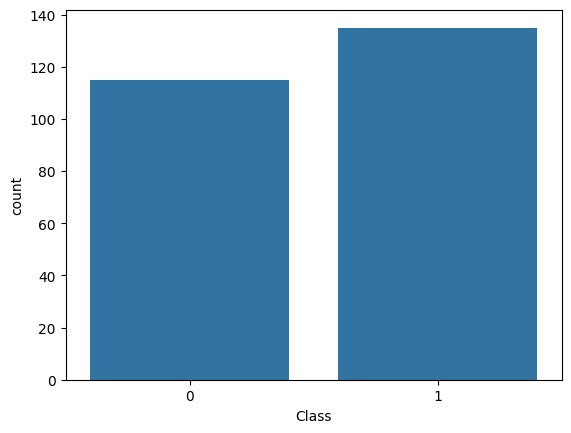

In [11]:
# Plotting the distribution of target variables for dataset:
sns.countplot(x = "Class", data = df)

# Storing data in lists:
text, sentiment = list(df["Patient's Review"]), list(df["Class"])

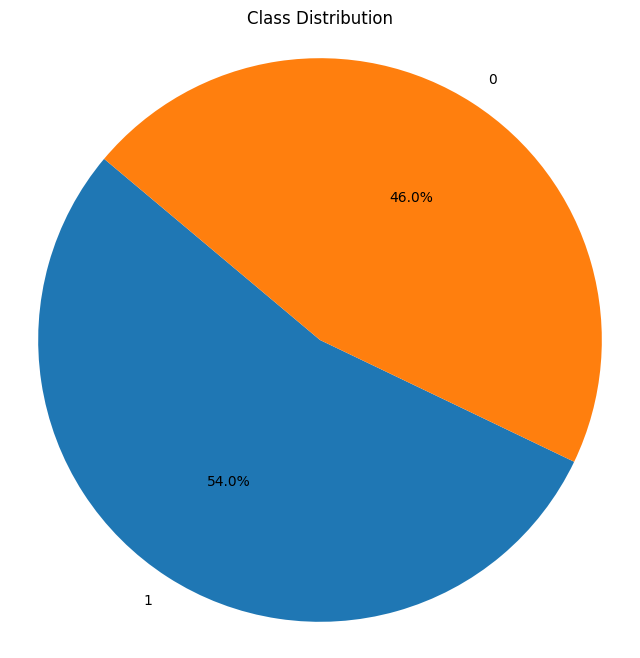

In [12]:
# Pie chart for Class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Data preprocessing

In [13]:
# We choose only two columns for the analysis
data = df[["Patient's Review", "Class"]]

In [14]:
# Separating positive & negative tweets
data_positive =  data[data["Class"] == 1]
data_negative = data[data["Class"] == 0]

In [15]:
# Training the model on smaller sample size:
data_pos  = data_positive.iloc[:int(20000)]
data_neg = data_negative.iloc[:int(20000)]

In [16]:
# combining positive & negative tweets
dataset = pd.concat([data_pos, data_neg])

In [17]:
# lower cases text:
dataset["Patient's Review"] = dataset["Patient's Review"].str.lower()
dataset["Patient's Review"].head()

,Patient's Review
0,took my 8-year-old daughter for a uti. the sta...
1,my 7 year old son just went for his 2nd visit ...
2,i appreciate the cleanliness of the office! su...
3,i was treated with respect and the staff had a...
4,the nurse was amazing. she was very caring and...


In [18]:
# Defining set of all stopwords (search on the internet):

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [19]:
# Cleaning & remove stop words

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in set(stopwordlist)])

dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda text1: cleaning_stopwords(text1))

In [20]:
# The cleaned dataset after stopwords removal:
dataset["Patient's Review"].head()

,Patient's Review
0,took 8-year-old daughter uti. staff phenomenal...
1,7 year old son went 2nd visit well-key. visits...
2,appreciate cleanliness office! great benefit o...
3,treated respect staff professional attitude. w...
4,nurse amazing. caring sweet. knew helpful. eve...


In [21]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset["Patient's Review"]= dataset["Patient's Review"].apply(lambda x: cleaning_punctuations(x))
dataset["Patient's Review"].tail()

,Patient's Review
245,definitely money minded hospital wont let know...
246,hospital admission no response staffs room no...
247,wife got admitted accidentally near office not...
248,look money never respond back refunddoctor alw...
249,worst hospitaldont go therefully money mindedw...


In [22]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', "", data)
dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: cleaning_numbers(x))
dataset["Patient's Review"].head()

,Patient's Review
0,took yearold daughter uti staff phenomenal bet...
1,year old son went nd visit wellkey visits sun...
2,appreciate cleanliness office great benefit of...
3,treated respect staff professional attitude wo...
4,nurse amazing caring sweet knew helpful ever n...


In [23]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset["Patient's Review"] = dataset["Patient's Review"].apply(tokenizer.tokenize)
dataset.head()

,Patient's Review,Class
0,"[took, yearold, daughter, uti, staff, phenomen...",1
1,"[year, old, son, went, nd, visit, wellkey, vis...",1
2,"[appreciate, cleanliness, office, great, benef...",1
3,"[treated, respect, staff, professional, attitu...",1
4,"[nurse, amazing, caring, sweet, knew, helpful,...",1


In [24]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: stemming_on_text(x))
dataset["Patient's Review"].head()

,Patient's Review
0,"[took, yearold, daughter, uti, staff, phenomen..."
1,"[year, old, son, went, nd, visit, wellkey, vis..."
2,"[appreciate, cleanliness, office, great, benef..."
3,"[treated, respect, staff, professional, attitu..."
4,"[nurse, amazing, caring, sweet, knew, helpful,..."


In [25]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: lemmatizer_on_text(x))
dataset["Patient's Review"].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Patient's Review
0,"[took, yearold, daughter, uti, staff, phenomen..."
1,"[year, old, son, went, nd, visit, wellkey, vis..."
2,"[appreciate, cleanliness, office, great, benef..."
3,"[treated, respect, staff, professional, attitu..."
4,"[nurse, amazing, caring, sweet, knew, helpful,..."


Splitting x and y

In [26]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [27]:
x

array([['Well Key Health',
        'Took my 8-year-old daughter for a UTI. The staff was phenomenal and better with kids than most places just for kids. Wish I got their names but the lady at check-in and the nurse or MA who took her vitals you ladies deserve a raise and recognition for your excellent attitudes and service. Much obliged.'],
       ['Well Key Health',
        'My 7 year old son just went for his 2nd visit to Well-Key. Both visits were on a Sunday evening. We were in and out in under an hour both times, with hardly any wait time. Even for a weekend night, the staff was super friendly and kind, from check-in to check out. Everyone made sure he got a Popsicle and stickers and said they hoped he felt better. A note for school was ready at check out. The prescription was ready as soon as we got to the pharmacy. I cannot say enough good things. Iâ€™ve told everyone I know what a great place this is! Thanks so much Well-Key!'],
       ['Well Key Health',
        'I appreciate 

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Word cloud

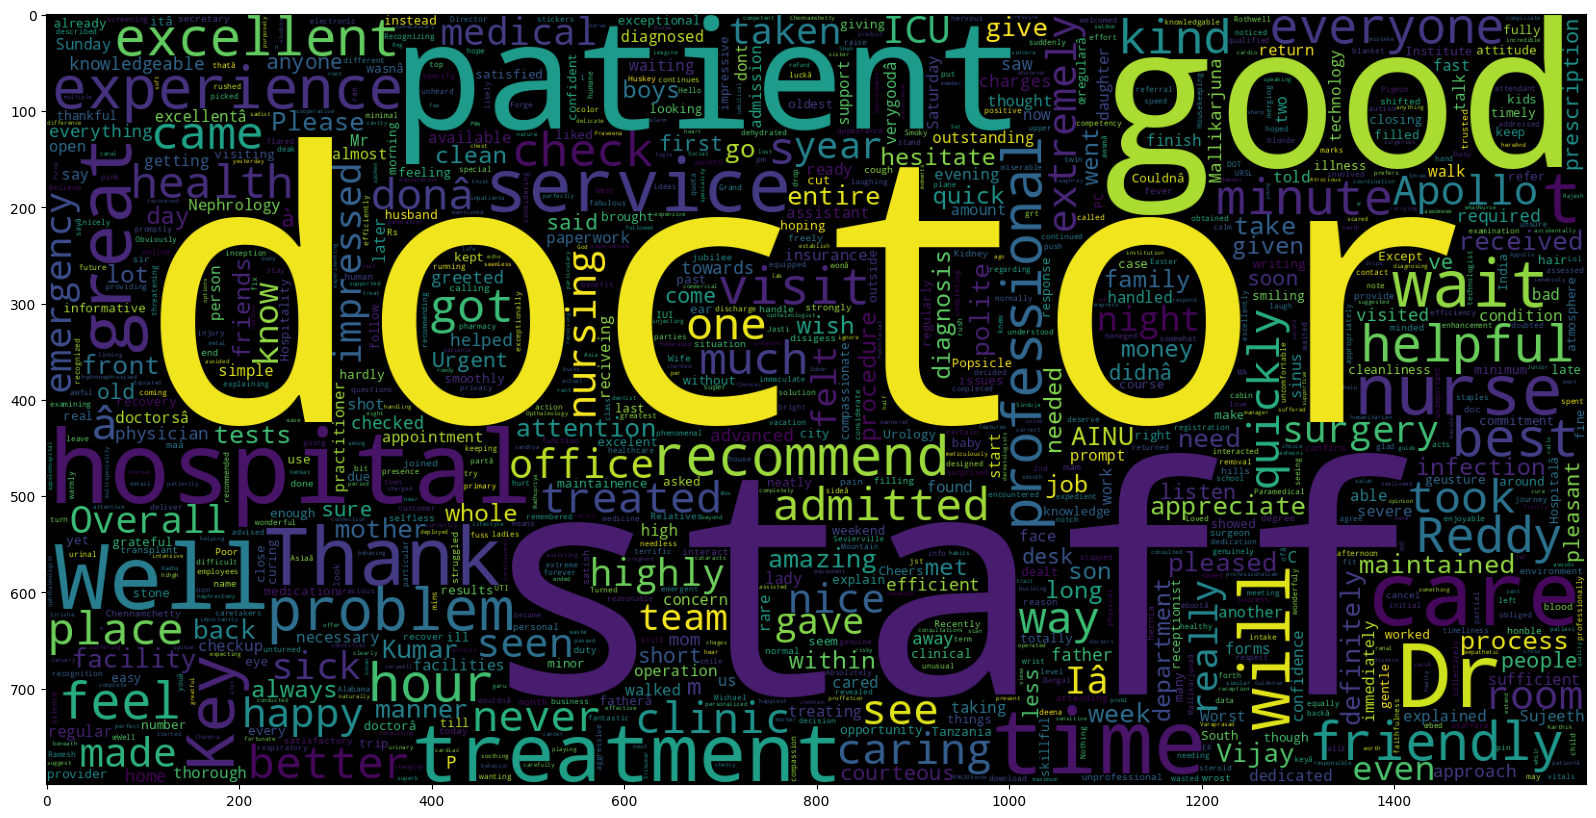

In [29]:
data_pos = data["Patient's Review"][:150]
plt.figure(figsize = (20, 10))
wc = WordCloud(max_words = 1000, width = 1600, height = 800,collocations = False).generate(" ".join(data_pos))
plt.imshow(wc)

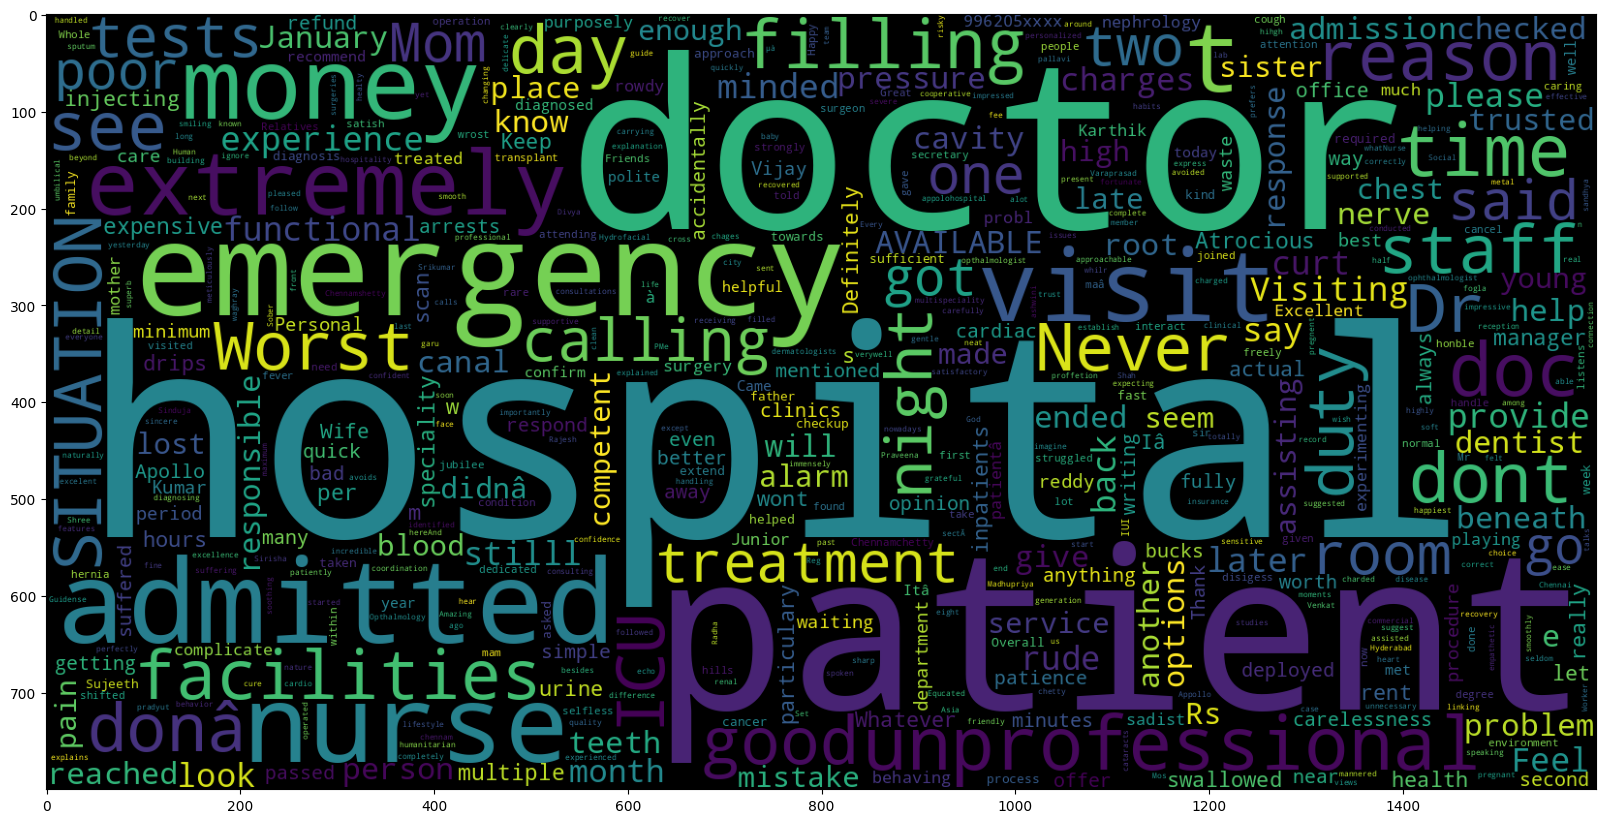

In [30]:
data_neg = data["Patient's Review"][100:]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800,collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)

Model building

Train and test split

In [31]:
# Separating 90% for training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [32]:
import numpy as np

def convert_to_string(row):
    # Initialize an empty string to store the concatenated elements
    string_row = ""

    # Iterate over each element in the row
    for item in row:
        # Convert each element to a string and concatenate it with a space
        string_row += str(item) + " "

    # Return the concatenated string, removing the trailing space
    return string_row.strip()

# Transforming X_train and X_test
X_train_strings = [convert_to_string(row) for row in X_train]
X_test_strings = [convert_to_string(row) for row in X_test]

Transforming the data using TF-IDF Vectorizer

In [33]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train_strings)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [34]:
X_train = vectoriser.transform(X_train_strings)
X_test  = vectoriser.transform(X_test_strings)

Model Evaluation

In [35]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Model building

Bernoulli Naive Bayes Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



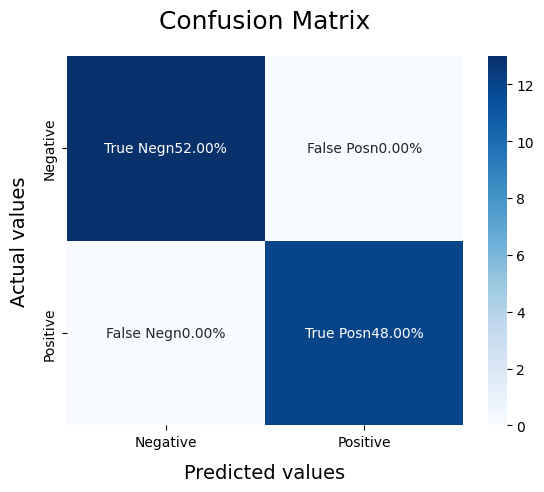

In [36]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

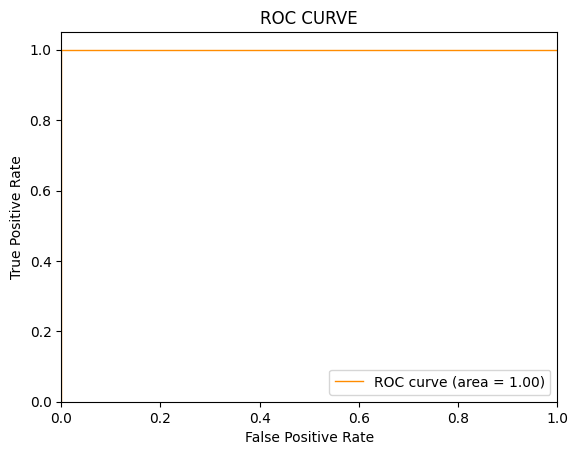

In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



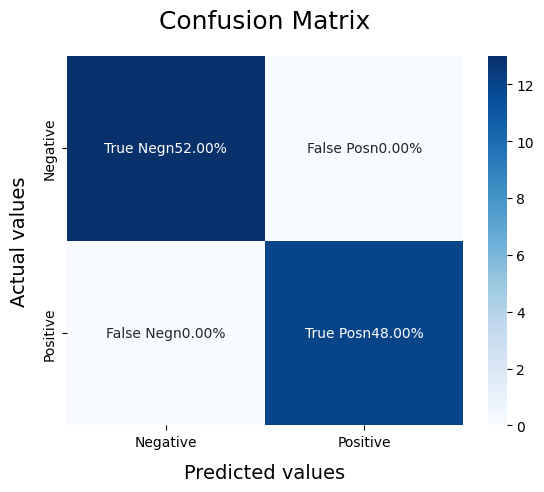

In [38]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

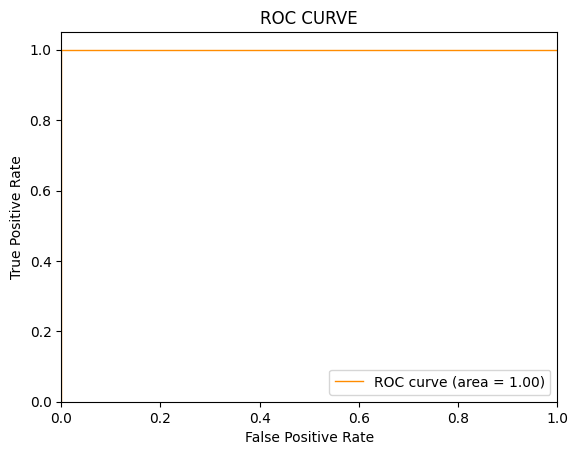

In [39]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



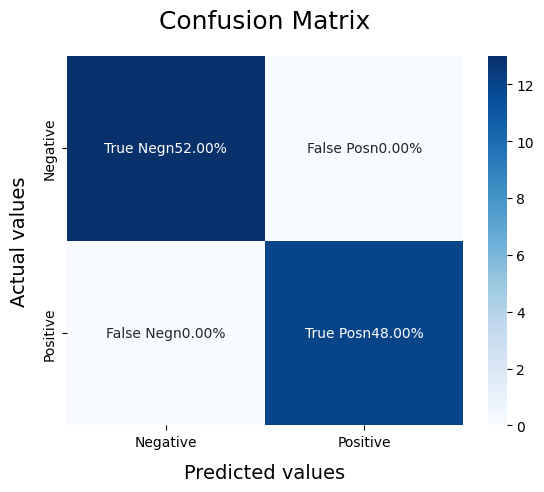

In [40]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

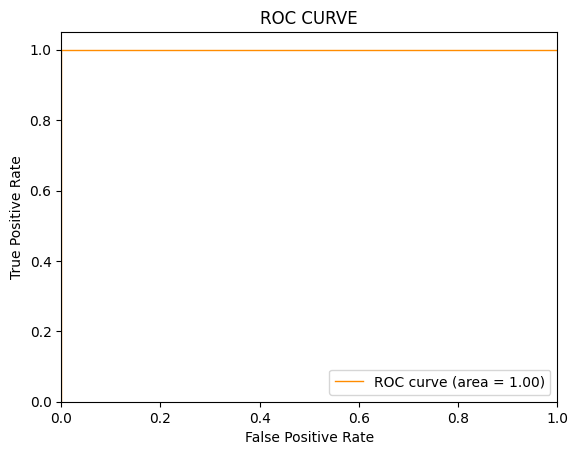

In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()